Import neccessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re    # regular expression
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Import dataset

In [4]:
data = data_PBI = pd.read_excel('cmiyp_scrapped_tweets.xlsx')
data

,Tweet text,Date,Retweets,Likes,Language,Translated Tweet
0,अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...,2023-07-18T02:40:30.000Z,144,186,hi,Atal Bihari Vajpayee's good governance and pol...
1,जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...,2023-07-18T07:15:04.000Z,18,21,hi,Janseva Mitra program batch - 2 of 2 has start...
2,India’s biggest internship drive. .,2023-07-18T06:36:20.000Z,30,27,en,India’s biggest internship drive. .
3,मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...,2023-07-17T15:22:55.000Z,169,268,hi,The Chief Minister shared his experience durin...
4,मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...,2023-07-17T13:39:54.000Z,104,148,hi,The process of first day interview for Chief M...
...,...,...,...,...,...,...
521,प्रशिक्षण के दौरान कलेक्टर श्री सिंह ने युवाओं...,2023-03-03T14:24:11.000Z,10,33,hi,"During the training, Collector Shri Singh told..."
522,मुख्यमंत्री यूथ इंटर्नशिप फोर प्रोफेशनल डेवलेप...,2023-03-02T16:39:41.000Z,6,43,hi,03 -day training of Jan Seva Mitra starts unde...
523,ट्रेनिंग के माध्यम से को शासकीय योजनाओं का क्...,2023-03-02T12:42:26.000Z,77,154,hi,"Through training, the implementation of govern..."
524,शासन की चिन्हित योजनाओं का प्रचार-प्रसार करने ...,2023-03-02T07:35:26.000Z,9,43,hi,Collector Shri Shivam Verma addressing a three...


In [5]:
tweets = data['Translated Tweet']
tweets

0      Atal Bihari Vajpayee's good governance and pol...
1      Janseva Mitra program batch - 2 of 2 has start...
2                  India’s biggest internship drive.   .
3      The Chief Minister shared his experience durin...
4      The process of first day interview for Chief M...
                             ...                        
521    During the training, Collector Shri Singh told...
522    03 -day training of Jan Seva Mitra starts unde...
523    Through training, the implementation of govern...
524    Collector Shri Shivam Verma addressing a three...
525    A divisional brainstorming meeting was organis...
Name: Translated Tweet, Length: 526, dtype: object

In [6]:
df = pd.DataFrame(tweets)
df

,Translated Tweet
0,Atal Bihari Vajpayee's good governance and pol...
1,Janseva Mitra program batch - 2 of 2 has start...
2,India’s biggest internship drive. .
3,The Chief Minister shared his experience durin...
4,The process of first day interview for Chief M...
...,...
521,"During the training, Collector Shri Singh told..."
522,03 -day training of Jan Seva Mitra starts unde...
523,"Through training, the implementation of govern..."
524,Collector Shri Shivam Verma addressing a three...


In [7]:
for i in df['Translated Tweet']:
    print(i)
    print()

Atal Bihari Vajpayee's good governance and policy analysis appreciate all the works conducted by public service friends. 

 Best wishes to our dear friends for their successes and for a bright future.

Janseva Mitra program batch - 2 of 2 has started. Applicants who come to give interviews are excited and the batch - 1 public service friend of 1 is encouraged to work with new colleagues. 
 District - Khargone

India’s biggest internship drive.   .

The Chief Minister shared his experience during an interview of Batch -2 by Jan Seva Mitras of the Chief Minister Youth Internship Program Batch -1. He sent thanks to the Honorable Chief Minister for giving this opportunity once again.

The process of first day interview for Chief Minister Janseva Mitra Batch-2 was completed today. Out of 105 candidates invited by other members of the three -member team, including Additional Collector Mr. Roshan Rai, 62 candidates have been interviewed.

Public service friends have made extraordinary efforts

Removing special charecters or pattern

In [8]:
def remove_patterns(text):
    pattern = '([\d+])|([-,&₹:])|[\s+]|(… Show More)'
    
    return ' '.join((re.sub(pattern,' ',str(text)).split())) 

In [9]:
df['clean_text'] = df['Translated Tweet'].apply(lambda x: remove_patterns(x))
df

,Translated Tweet,clean_text
0,Atal Bihari Vajpayee's good governance and pol...,Atal Bihari Vajpayee's good governance and pol...
1,Janseva Mitra program batch - 2 of 2 has start...,Janseva Mitra program batch of has started. Ap...
2,India’s biggest internship drive. .,India’s biggest internship drive. .
3,The Chief Minister shared his experience durin...,The Chief Minister shared his experience durin...
4,The process of first day interview for Chief M...,The process of first day interview for Chief M...
...,...,...
521,"During the training, Collector Shri Singh told...",During the training Collector Shri Singh told ...
522,03 -day training of Jan Seva Mitra starts unde...,day training of Jan Seva Mitra starts under Ch...
523,"Through training, the implementation of govern...",Through training the implementation of governm...
524,Collector Shri Shivam Verma addressing a three...,Collector Shri Shivam Verma addressing a three...


In [10]:
for i in df['clean_text']:
    print(i)
    print()

Atal Bihari Vajpayee's good governance and policy analysis appreciate all the works conducted by public service friends. Best wishes to our dear friends for their successes and for a bright future.

Janseva Mitra program batch of has started. Applicants who come to give interviews are excited and the batch public service friend of is encouraged to work with new colleagues. District Khargone

India’s biggest internship drive. .

The Chief Minister shared his experience during an interview of Batch by Jan Seva Mitras of the Chief Minister Youth Internship Program Batch . He sent thanks to the Honorable Chief Minister for giving this opportunity once again.

The process of first day interview for Chief Minister Janseva Mitra Batch was completed today. Out of candidates invited by other members of the three member team including Additional Collector Mr. Roshan Rai candidates have been interviewed.

Public service friends have made extraordinary efforts for development by reaching every dir

Delete Null valued rows.

In [11]:
df.isnull().sum()

Translated Tweet    6
clean_text          0
dtype: int64

In [12]:
df.dropna()

,Translated Tweet,clean_text
0,Atal Bihari Vajpayee's good governance and pol...,Atal Bihari Vajpayee's good governance and pol...
1,Janseva Mitra program batch - 2 of 2 has start...,Janseva Mitra program batch of has started. Ap...
2,India’s biggest internship drive. .,India’s biggest internship drive. .
3,The Chief Minister shared his experience durin...,The Chief Minister shared his experience durin...
4,The process of first day interview for Chief M...,The process of first day interview for Chief M...
...,...,...
521,"During the training, Collector Shri Singh told...",During the training Collector Shri Singh told ...
522,03 -day training of Jan Seva Mitra starts unde...,day training of Jan Seva Mitra starts under Ch...
523,"Through training, the implementation of govern...",Through training the implementation of governm...
524,Collector Shri Shivam Verma addressing a three...,Collector Shri Shivam Verma addressing a three...


#### removing stop words

In [15]:
import nltk  
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aship\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
eng_stop_words =list(set(stopwords.words('english')))
print(eng_stop_words)

["won't", 'we', 'had', 'of', 'is', "don't", 'o', 'yourself', "doesn't", 'so', 'didn', 'and', 'were', 'y', 'have', 'why', 'was', 'hadn', 'our', 'do', 'most', 'these', "should've", 'mightn', 'who', "you'd", 'by', 's', 'few', 'wouldn', 'into', 'ma', 'don', 'doesn', 'won', 'those', "shouldn't", "weren't", 'its', 'where', 'here', 'if', 'each', 'aren', "wouldn't", 'are', 'on', 'up', "isn't", 'or', 'mustn', 'before', 'yourselves', 'his', 'themselves', 'which', 'does', 'more', 'to', 'over', 'the', "shan't", 'again', 'just', 'should', 'that', 'will', 'wasn', 'their', 'be', 'been', 'what', 'than', 'did', 'can', 'you', 'itself', 'm', 'weren', 'then', 'other', 'haven', 'under', 'only', 'yours', 'such', 'has', 'in', "that'll", 'it', 'he', 'about', "she's", 'further', 'ours', "you've", 'll', 'theirs', 'because', 'as', 'no', 'both', 'off', 'not', 'too', 'out', 'very', 'i', 'having', 't', 'being', 'ain', "you'll", 'couldn', 'between', 'this', "hasn't", 'through', 'her', 'nor', 'my', 'at', 'how', 'they

In [17]:
stop_words = []
hin_stop_words = list(set(stopwords.words('hinglish')))
stop_words = stop_words + hin_stop_words
print(stop_words)

['wahin', 'dega', 'followed', 'following', 'we', 'whereupon', 'within', 'meri', 'jitni', 'is', 'hoti', "don't", 'towards', 'yourself', 'hoga', 'were', 'nine', 'isski', 'sent', 'taken', 'little', 'self', 'hadnt', 'kahan', 'inward', 'asking', 'much', 'btw', 'apart', 'lekar', 'do', 'mustnt', 'mightn', 'bht', 'kaisi', 'saktaa', 'uske', 'appear', 'apni', 'han', 's', 'often', 'kiske', 'kehte', 'kinka', 'want', 'mane', 'karun', 'many', 'didnt', 'doesn', 'vo', 'waise', "weren't", 'thereupon', 'dekha', 'its', 'aren', 'if', 'raha', 'else', 'jabh', 'unto', 'bolta', 'kyunki', 'aya', 'sa', 'jidhar', 'rhaa', 'tere', 'di', 'moreover', 'jaa', 'please', 'unho', 'thoda', 'kin', 'aisa', 'jitna', 'however', 'jahan', 'ka', 'log', 'themselves', 'does', 'vaali', 'gets', 'perhaps', 'others', 'outside', 'again', 'sabhi', 'wherein', 'looks', 'wasn', 'inhe', 'dhang', 'keep', 'vaale', 'kahin', 'happens', 'jis', "we'll", 'kahaan', 'hain', 'willing', 'seen', 'tarah', 'werent', 'wagairah', 'see', 'across', 'you', 'm

In [18]:
def remove_stopword(text):
    fetch =[]
    text = str(text)
    for token in text.split():
        if str(token) not in stop_words:
            fetch.append(token)
    return ' '.join(fetch)

In [19]:
df['clean_text'] = df['clean_text'].apply(remove_stopword)
df

,Translated Tweet,clean_text
0,Atal Bihari Vajpayee's good governance and pol...,Atal Bihari Vajpayee's governance policy analy...
1,Janseva Mitra program batch - 2 of 2 has start...,Janseva Mitra program batch started. Applicant...
2,India’s biggest internship drive. .,India’s biggest internship drive. .
3,The Chief Minister shared his experience durin...,The Chief Minister shared experience interview...
4,The process of first day interview for Chief M...,The process day interview Chief Minister Janse...
...,...,...
521,"During the training, Collector Shri Singh told...",During training Collector Shri Singh told yout...
522,03 -day training of Jan Seva Mitra starts unde...,day training Jan Seva Mitra starts Chief Minis...
523,"Through training, the implementation of govern...",Through training implementation government sch...
524,Collector Shri Shivam Verma addressing a three...,Collector Shri Shivam Verma addressing day tra...


#### stemming words

In [20]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [21]:
def stemping_word(text):
    word_collector = []
    splitted_text = text.split()
    
    for word in splitted_text:
        word_collector.append(stemmer.stem(word))
        
    return " ".join(word_collector)

In [22]:
df['clean_text'] = df['clean_text'].apply(lambda x: stemping_word(str(x)))
df

,Translated Tweet,clean_text
0,Atal Bihari Vajpayee's good governance and pol...,atal bihari vajpayee' govern polici analysi ap...
1,Janseva Mitra program batch - 2 of 2 has start...,janseva mitra program batch started. applic gi...
2,India’s biggest internship drive. .,india’ biggest internship drive. .
3,The Chief Minister shared his experience durin...,the chief minist share experi interview batch ...
4,The process of first day interview for Chief M...,the process day interview chief minist janseva...
...,...,...
521,"During the training, Collector Shri Singh told...",dure train collector shri singh told youth fie...
522,03 -day training of Jan Seva Mitra starts unde...,day train jan seva mitra start chief minist yo...
523,"Through training, the implementation of govern...",through train implement govern scheme coordin ...
524,Collector Shri Shivam Verma addressing a three...,collector shri shivam verma address day train ...


#### labeling

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aship\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [29]:
df['compound'] = df['clean_text'].apply(lambda x: sa.polarity_scores(x)['compound'])

In [30]:
df

,Translated Tweet,clean_text,compound
0,Atal Bihari Vajpayee's good governance and pol...,atal bihari vajpayee' govern polici analysi ap...,0.9698
1,Janseva Mitra program batch - 2 of 2 has start...,janseva mitra program batch started. applic gi...,0.4939
2,India’s biggest internship drive. .,india’ biggest internship drive. .,0.0000
3,The Chief Minister shared his experience durin...,the chief minist share experi interview batch ...,0.6597
4,The process of first day interview for Chief M...,the process day interview chief minist janseva...,0.0000
...,...,...,...
521,"During the training, Collector Shri Singh told...",dure train collector shri singh told youth fie...,0.0000
522,03 -day training of Jan Seva Mitra starts unde...,day train jan seva mitra start chief minist yo...,0.0000
523,"Through training, the implementation of govern...",through train implement govern scheme coordin ...,0.0000
524,Collector Shri Shivam Verma addressing a three...,collector shri shivam verma address day train ...,0.4939


Labeling the sentiments.

In [31]:
def labeling(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [32]:
df['label'] = df['compound'].apply(lambda x: labeling(x))
# df.drop(['Translated Tweet'],axis =1,inplace = True)
data_PBI['compound'] = df['compound']
data_PBI['label'] = df['label']
df

,Translated Tweet,clean_text,compound,label
0,Atal Bihari Vajpayee's good governance and pol...,atal bihari vajpayee' govern polici analysi ap...,0.9698,Positive
1,Janseva Mitra program batch - 2 of 2 has start...,janseva mitra program batch started. applic gi...,0.4939,Positive
2,India’s biggest internship drive. .,india’ biggest internship drive. .,0.0000,Neutral
3,The Chief Minister shared his experience durin...,the chief minist share experi interview batch ...,0.6597,Positive
4,The process of first day interview for Chief M...,the process day interview chief minist janseva...,0.0000,Neutral
...,...,...,...,...
521,"During the training, Collector Shri Singh told...",dure train collector shri singh told youth fie...,0.0000,Neutral
522,03 -day training of Jan Seva Mitra starts unde...,day train jan seva mitra start chief minist yo...,0.0000,Neutral
523,"Through training, the implementation of govern...",through train implement govern scheme coordin ...,0.0000,Neutral
524,Collector Shri Shivam Verma addressing a three...,collector shri shivam verma address day train ...,0.4939,Positive


In [33]:
y = list(df['label'].value_counts())
y

[320, 172, 34]

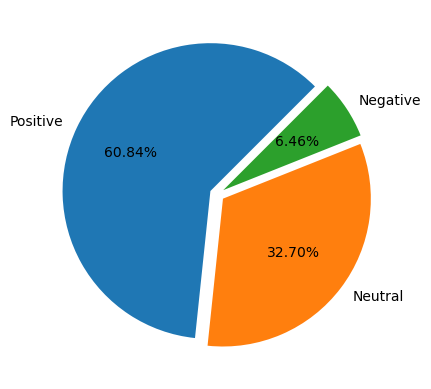

In [34]:
mylabels = ['Positive','Neutral','Negative']
# plt.pie(y, labels = mylabels)
plt.pie(y,labels = mylabels, startangle = 45,explode=(0.05, 0.05, 0.05), autopct='%1.2f%%')
plt.show() 

In [35]:
data_PBI.rename(columns = {'label':'sentiments'}, inplace = True)

In [36]:
data_PBI

,Tweet text,Date,Retweets,Likes,Language,Translated Tweet,compound,sentiments
0,अटल बिहारी वाजपेयी सुशासन एवं नीति विश्लेषण सं...,2023-07-18T02:40:30.000Z,144,186,hi,Atal Bihari Vajpayee's good governance and pol...,0.9698,Positive
1,जनसेवा मित्र कार्यक्रम बैच - 2 के साक्षत्कार प...,2023-07-18T07:15:04.000Z,18,21,hi,Janseva Mitra program batch - 2 of 2 has start...,0.4939,Positive
2,India’s biggest internship drive. .,2023-07-18T06:36:20.000Z,30,27,en,India’s biggest internship drive. .,0.0000,Neutral
3,मुख्यमंत्री युवा इंटर्नशिप कार्यक्रम बैच- 1 के...,2023-07-17T15:22:55.000Z,169,268,hi,The Chief Minister shared his experience durin...,0.6597,Positive
4,मुख्यमंत्री जनसेवा मित्र बैच-2 के लिए आज प्रथम...,2023-07-17T13:39:54.000Z,104,148,hi,The process of first day interview for Chief M...,0.0000,Neutral
...,...,...,...,...,...,...,...,...
521,प्रशिक्षण के दौरान कलेक्टर श्री सिंह ने युवाओं...,2023-03-03T14:24:11.000Z,10,33,hi,"During the training, Collector Shri Singh told...",0.0000,Neutral
522,मुख्यमंत्री यूथ इंटर्नशिप फोर प्रोफेशनल डेवलेप...,2023-03-02T16:39:41.000Z,6,43,hi,03 -day training of Jan Seva Mitra starts unde...,0.0000,Neutral
523,ट्रेनिंग के माध्यम से को शासकीय योजनाओं का क्...,2023-03-02T12:42:26.000Z,77,154,hi,"Through training, the implementation of govern...",0.0000,Neutral
524,शासन की चिन्हित योजनाओं का प्रचार-प्रसार करने ...,2023-03-02T07:35:26.000Z,9,43,hi,Collector Shri Shivam Verma addressing a three...,0.4939,Positive


In [37]:
data_PBI.to_excel('data_PBI.xlsx')